In [1]:
import src.web_scraping.downloading_metrics as downloading
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

mode = 'running'# 'watching'

DOWNLOAD COUNTRIES


### Thesis : Analysis of Populations Age Structure
Ageing rate = Percentage of 0-14 years children / Percentage of > 65 years elderly
Median age
Population pyramid:
    1. A youthful distribution
    2. A transitional distribution
    3. A mature distribution


Add https://www.cia.gov/the-world-factbook/field/food-insecurity/
https://www.cia.gov/the-world-factbook/field/gross-reproduction-rate/
hiv rate?


In [2]:
# TODO: what other variables to consider; continents

categorical_metrics = [
     'location', 'food insecurity'
]

numerical_metrics = ['infant mortality rate', 'population growth rate',
    'age structure', 'birth rate', 'net migration rate',
    'alcohol consumption per capita', 'child marriage',
    'contraceptive prevalence rate',
    'currently married women ages 15 49', 'death rate',
    'education expenditures', 'gdp official exchange rate',
    'gini index coefficient distribution of family income',
    'labor force by occupation', 'life expectancy at birth',
    'literacy', 'maternal mortality ratio',
    'mothers mean age at first birth',
    'obesity adult prevalence rate', 'physicians density',
    'population below poverty line',
    'school life expectancy primary to tertiary education',
    'sex ratio', 'tobacco use', 'total fertility rate',
    'unemployment rate', 'current health expenditure', 'median age', 'dependency ratios',
     'drinking water source', 'population', 'labor force by occupation']

# Integer encoding is only appropriate when there is a known relationship between categories
# Food insecurity : Integer Encoding,
# Location : One hot encoding

In [3]:
if mode == 'running':
    downloading.download_metrics(categorical_metrics + numerical_metrics)

### Explanatory data analysis

In [5]:
median_age = downloading.open_metric('median age')
age_structure = downloading.open_metric('age structure')

print(median_age.shape)
print(age_structure.shape)

print(median_age.head())
print(age_structure.head())

(194, 3)
(194, 3)
             total  male  female
country                         
Afghanistan   19.5  19.4    19.5
Albania       34.3  32.9    35.7
Algeria       28.9  28.6    29.3
Andorra       46.2  46.3    46.1
Angola        15.9  15.4    16.4
             0-14 years  15-64 years  65 years and over
country                                                
Afghanistan       39.80        57.35               2.85
Albania           17.90        67.53              14.57
Algeria           28.78        64.29               6.93
Andorra           12.31        68.17              19.52
Angola            47.18        50.49               2.33


<AxesSubplot:xlabel='total', ylabel='Count'>

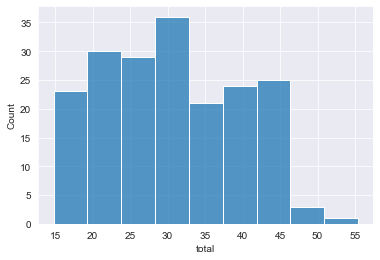

In [6]:
sns.histplot(data=median_age, x='total')

### Ageing populations
What are the main factors contributing to the ageing of population? Can we predict, based on other factors, whether population is ageing or not? And what should be the threshold to categorize a country as ageing?

We'll start with the most obvious one like: birth rate, life expectancy,

In [7]:
infant_mortality_rate = downloading.open_metric('infant mortality rate')
population_growth_rate = downloading.open_metric('population growth rate')
birth_rate = downloading.open_metric('birth rate')
net_migration_rate = downloading.open_metric('net migration rate')
alcohol_consumption_per_capita = downloading.open_metric('alcohol consumption per capita')
child_marriage = downloading.open_metric('child marriage')
life_expectancy = downloading.open_metric('life expectancy at birth')
death_rate = downloading.open_metric('death rate')
contraceptive_prevalence = downloading.open_metric('contraceptive prevalence rate')
currently_married_women_ages_15_49 = downloading.open_metric('currently married women ages 15 49')
maternal_mortality_ratio = downloading.open_metric('maternal mortality ratio')
health_expenditures = downloading.open_metric('current health expenditure')
gdp = downloading.open_metric('gdp official exchange rate')
gini_index_coefficient_distribution_of_family_income = downloading.open_metric('gini index coefficient distribution of family income')
labor_force_by_occupation = downloading.open_metric('labor force by occupation')
literacy = downloading.open_metric('literacy')
education_expenditures = downloading.open_metric('education expenditures')
population_below_poverty = downloading.open_metric('population below poverty line')
fertility_rate = downloading.open_metric('total fertility rate')
mothers_mean_age_at_first_birth = downloading.open_metric('mothers mean age at first birth')
# This could be split for age-groups
sex_ratio = downloading.open_metric('sex ratio')
obesity_adult_prevalence_rate = downloading.open_metric('obesity adult prevalence rate')
physicians_density = downloading.open_metric('physicians density')
school_life_expectancy = downloading.open_metric('school life expectancy primary to tertiary education')
tobacco_use = downloading.open_metric('tobacco use')
unemployment_rate = downloading.open_metric('unemployment rate')
# This rather not
dependency_ratios = downloading.open_metric('dependency ratios')
drinking_water_source = downloading.open_metric('drinking water source')
population = downloading.open_metric('population')

# Categorical metrics
location = downloading.open_metric('location')
food_insecurity = downloading.open_metric('food insecurity')

Next, we'll merge them into one dataframe for simpler comparisons

In [8]:
np.where(np.isnan(labor_force_by_occupation['industry']), labor_force_by_occupation['industry and services'], labor_force_by_occupation['industry'])

array([18.1, 18.3, 30.9,  4.4, 15. , 11. , 28.6, 17. , 21.1, 25.2, 14.3,
       32. , 20.5, 15. , 23.4, 18.6, 18.1,  nan, 20. , 22. , 30.4,  nan,
       32.1, 62.8, 26.6, 10. ,  7. ,  2.3,  nan, 19.9, 13. , 13. ,  nan,
       20. , 23.7, 28.8, 21. , 20. , 22. ,  nan, 27.3, 10. , 15.2,  nan,
        nan, 18.3,  nan, 32. , 20.8, 18.4, 25.1, 20. ,  nan, 20. , 20.5,
       30.4,  7.4,  5.2, 14.3, 20.7, 20. , 12. ,  8.9, 24.2, 14.4, 15. ,
       20. , 12.8, 24. , 18. ,  nan, 11.5,  nan, 20.9, 30.3, 22.2, 22. ,
       21. , 35.1, 18.7, 11. , 17.3, 28.3, 16. , 26.2, 20. , 20.4,  6.7,
       10. , 17.4,  nan, 12.5,  6.1, 24.1,  nan, 14. ,  8. , 23. , 36.9,
       25.2, 20. ,  nan,  4.1, 36. , 22.8, 20. , 20.7, 16.3,  1.9, 29.8,
       24.1, 12. , 16.1, 18.5, 17.1, 20.3,  3.9, 14. ,  nan, 12. , 17.2,
       20.7, 18. ,  3.3, 10. , 63. , 29.2, 19.3, 49.6, 22.6, 12.4, 18.6,
        nan, 18.5, 17.4, 18.3, 30.4, 23.9,  nan, 20.6, 28.9, 27.6,  6.7,
        nan, 24.7, 17. ,  6. , 33.5, 21.4, 21.4, 22

In [9]:
countries_data = pd.DataFrame(index=age_structure.index)

countries_data['infant mortality rate'] = infant_mortality_rate['total']
countries_data['population growth rate'] = population_growth_rate['rate']
countries_data['net migration rate'] = net_migration_rate['rate']
countries_data['alcohol consumption per capita'] = alcohol_consumption_per_capita['total']
countries_data['wine consumption'] = alcohol_consumption_per_capita['wine']
countries_data['women marriage by 18'] = child_marriage['women married by age 18']
countries_data['men marriage by 18'] = child_marriage['men married by age 18']
countries_data['currently married women ages 15-49'] = currently_married_women_ages_15_49['rate']
countries_data['birth rate'] = birth_rate['rate']
countries_data['life expectancy female'] = life_expectancy['female']
countries_data['life expectancy male'] = life_expectancy['male']
countries_data['life expectancy total'] = life_expectancy['total population']
countries_data['death rate'] = death_rate['rate']
countries_data['gini index coefficient distribution of family income'] = gini_index_coefficient_distribution_of_family_income['rate']
countries_data['agriculture occupation ratio'] = labor_force_by_occupation['agriculture']
countries_data['industry occupation ratio'] = pd.DataFrame(data=np.where(np.isnan(labor_force_by_occupation['industry']), labor_force_by_occupation['industry and services'], labor_force_by_occupation['industry']), index=labor_force_by_occupation.index)
countries_data['services occupation ratio'] = labor_force_by_occupation['services']
countries_data['contraceptive prevalence'] = contraceptive_prevalence['rate']
countries_data['maternal mortality ratio'] = maternal_mortality_ratio['rate']
countries_data['health expenditures'] = health_expenditures['expenditures']
countries_data['gdp'] = gdp['rate']
countries_data['literacy female'] = literacy['female']
countries_data['literacy male'] = literacy['male']
countries_data['literacy total'] = literacy['total population']
countries_data['mothers mean age at first birth'] = mothers_mean_age_at_first_birth['rate']
countries_data['obesity adult prevalence rate'] = obesity_adult_prevalence_rate['rate']
countries_data['physicians density'] = physicians_density['rate']
countries_data['school life expectancy female'] = school_life_expectancy['female']
countries_data['school life expectancy male'] = school_life_expectancy['male']
countries_data['school life expectancy total'] = school_life_expectancy['total']
countries_data['tobacco use female'] = tobacco_use['female']
countries_data['tobacco use male'] = tobacco_use['male']
countries_data['tobacco use total'] = tobacco_use['total']
countries_data['education expenditures'] = education_expenditures['rate']
countries_data['population below poverty'] = population_below_poverty['rate']
countries_data['fertility rate'] = fertility_rate['fertility_rate']
countries_data['drinking water source improved'] = drinking_water_source['improved_total']
countries_data['drinking water source unimproved'] = drinking_water_source['unimproved_total']
countries_data['sex ratio'] = sex_ratio['total population']
countries_data['unemployment rate'] = unemployment_rate['2021']
countries_data['population'] = population['population']

# countries_data['ageing_rate'] = age_structure['ageing_rate']

In [15]:
from sklearn.preprocessing import OrdinalEncoder

food_insecurity = food_insecurity.fillna('not present')

food_insecurity_categories = [['not present', 'exceptional shortfall in aggregate food production/supplies',
                             'widespread lack of access',
                             'severe localized food insecurity']]

encoder = OrdinalEncoder(categories=food_insecurity_categories, dtype=int)
X_fi = encoder.fit_transform(food_insecurity.values.reshape(-1, 1))

food_insecurity_encoded = pd.DataFrame(data=X_fi, index=food_insecurity.index, columns=['category'])

In [16]:
food_insecurity_encoded

,category
country,
Afghanistan,3
Albania,0
Algeria,0
Andorra,0
Angola,0
...,...
Venezuela,2
Vietnam,0
Yemen,2


<AxesSubplot:xlabel='total', ylabel='Count'>

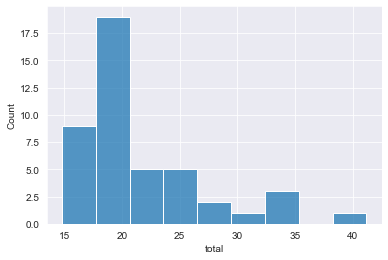

In [20]:
sns.histplot(data=median_age.loc[food_insecurity_encoded.category > 0, 'total'])

In [21]:
location.location.unique()

array(['Asia', 'Europe', 'Africa', 'Caribbean', 'South America',
       'Oceania', 'Middle East', 'North America', nan], dtype=object)

Countries with no region assigned

In [22]:
location.loc[location.isna().values].index

Index(['Czech Republic', 'El Salvador', 'France', 'Seychelles'], dtype='object', name='country')

In [23]:
missing_regions = {
    'Czech Republic': 'Europe',
    'El Salvador': 'South America',
    'France': 'Europe',
    'Seychelles': 'Africa'
}

for key, value in missing_regions.items():
    location.at[key] = value

assert sum(location.isna().values) == 0

In [24]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
X_l = one_hot_encoder.fit_transform(location.values.reshape(-1, 1))
location_encoded = pd.DataFrame(data=X_l, index=location.index)

In [25]:
print(countries_data.describe())

       infant mortality rate  population growth rate  net migration rate  \
count             192.000000              193.000000          192.000000   
mean               21.282552                1.058238           -0.248542   
std                19.175452                1.123748            5.540026   
min                 1.510000               -1.140000          -20.920000   
25%                 6.447500                0.310000           -1.852500   
50%                14.435000                0.850000           -0.280000   
75%                30.675000                1.680000            1.082500   
max               103.060000                6.390000           45.780000   

       alcohol consumption per capita  wine consumption  women marriage by 18  \
count                      185.000000        185.000000             73.000000   
mean                         4.659189          0.917135             22.286301   
std                          3.648946          1.403071             13.9

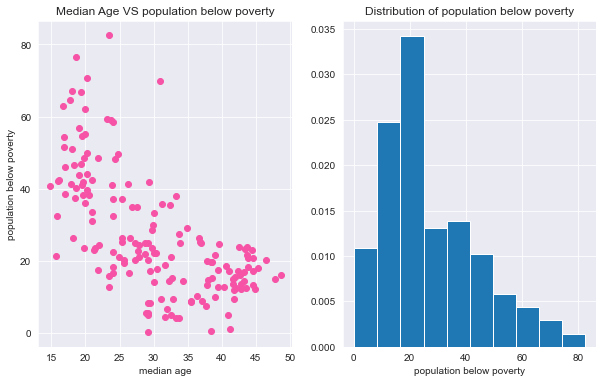

In [26]:
def plot_median_age_versus_metric(median_age_df, metric_series, metric_name, ax):
    ax.scatter(x=median_age_df, y=metric_series, color='#f653a6')
    ax.set_title(f"Median Age VS {metric_name}")
    ax.set_xlabel('median age')
    ax.set_ylabel(metric_name)


def plot_metric_distribution(metric_series, metric_name, ax):
    ax.set_title(f"Distribution of {metric_name}")
    ax.set_xlabel(metric_name)
    ax.hist(metric_series, density=True)


fig, axes = plt.subplots(1, 2, figsize=(10, 6))
plot_median_age_versus_metric(median_age['total'], countries_data['population below poverty'], 'population below poverty', axes[0])
plot_metric_distribution(countries_data['population below poverty'], 'population below poverty', axes[1])

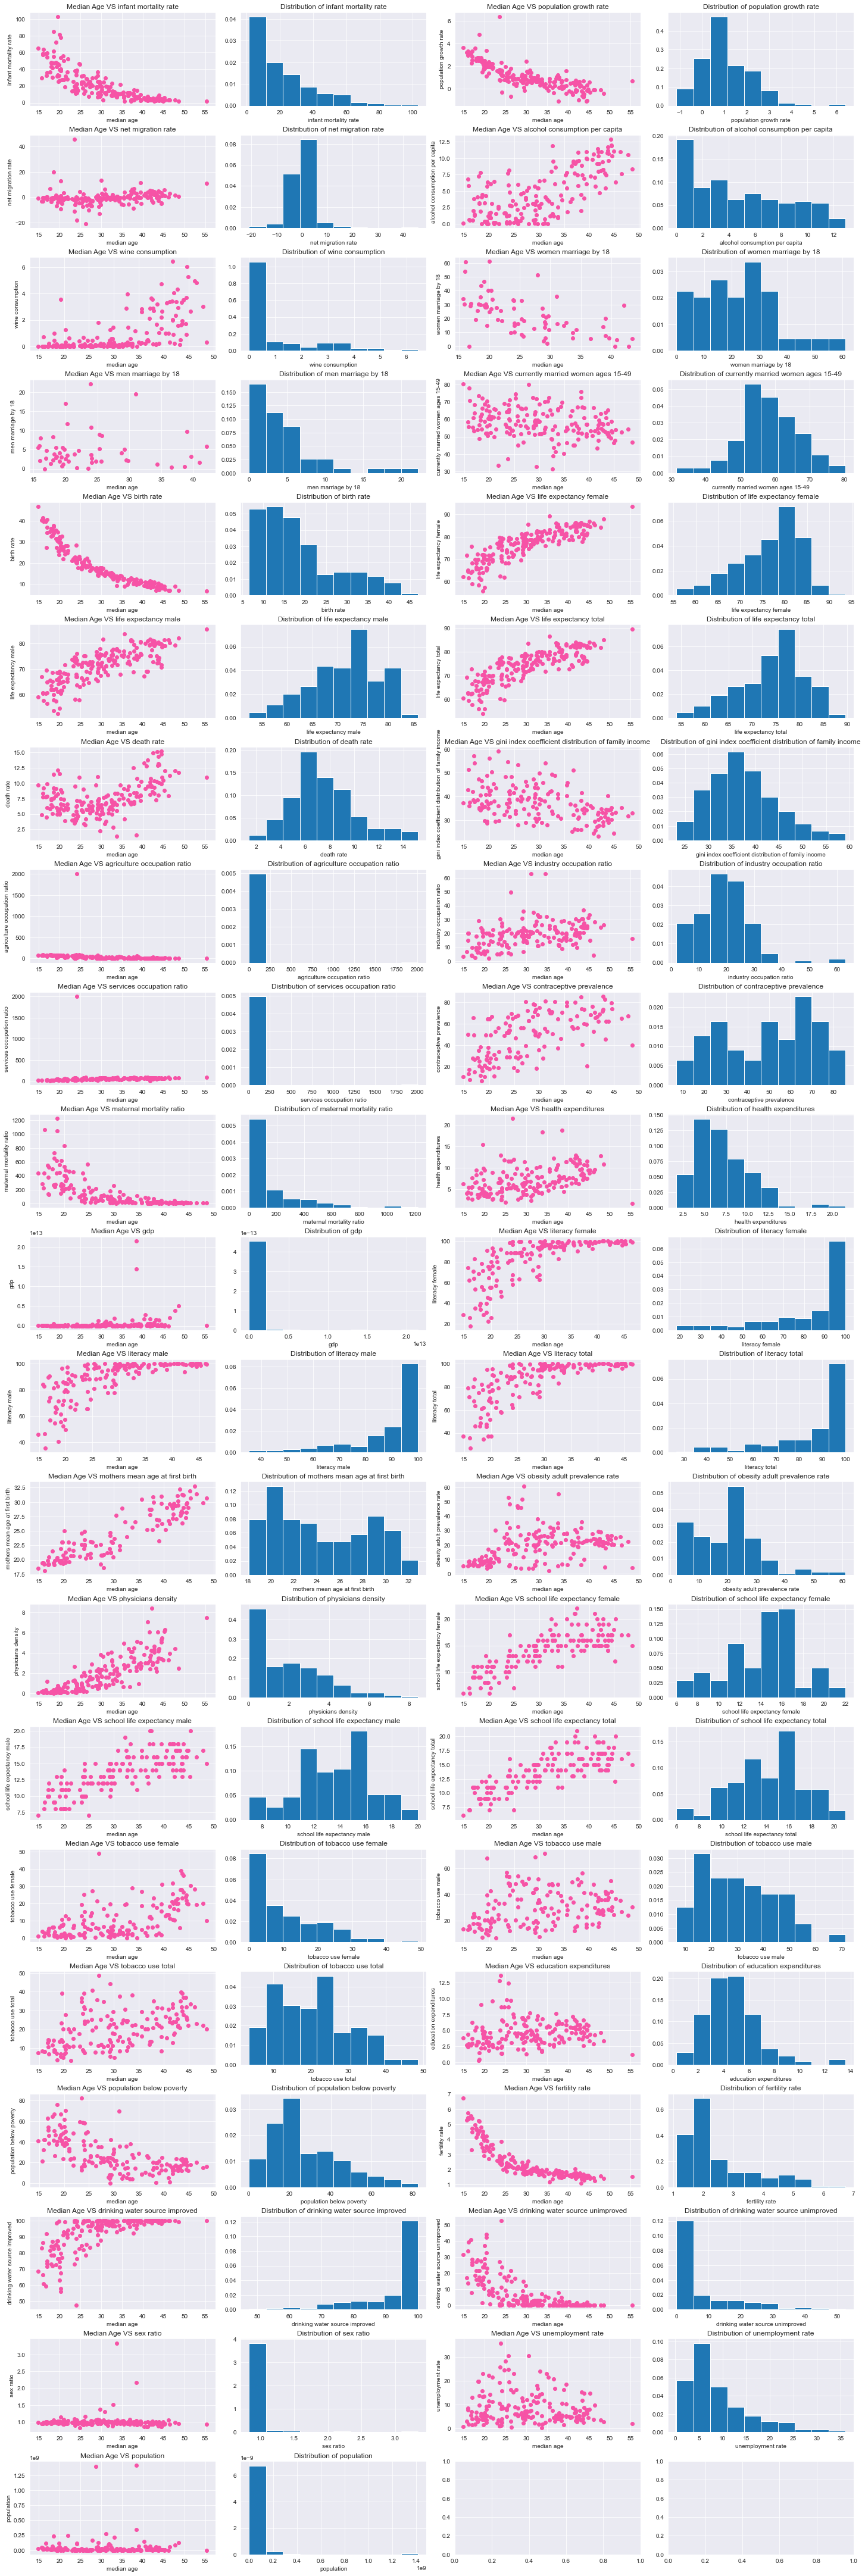

In [29]:
metrics_to_plot = countries_data.columns
n_rows = (len(metrics_to_plot) + 1) // 2
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 60), layout='constrained')

for i in range(n_rows):
    for j in range(2):
        index = 2 * i + j
        if index < len(metrics_to_plot):
            metric_name = metrics_to_plot[2 * i + j]
            plot_median_age_versus_metric(median_age['total'], countries_data[metric_name], metric_name, ax=axes[i, 2 * j])
            plot_metric_distribution(countries_data[metric_name], metric_name, ax=axes[i, 2 * j + 1])

In [9]:
print(age_structure.head())
print(age_structure.describe())
n_countries = age_structure.shape[0]

             0-14 years  15-64 years  65 years and over
country                                                
Afghanistan       39.80        57.35               2.85
Albania           17.90        67.53              14.57
Algeria           28.78        64.29               6.93
Andorra           12.31        68.17              19.52
Angola            47.18        50.49               2.33
       0-14 years  15-64 years  65 years and over
count  193.000000   193.000000         193.000000
mean    25.956528    63.992332          10.051244
std      9.756096     5.621466           6.933607
min      9.400000    47.600000           1.410000
25%     17.830000    61.170000           4.190000
50%     24.160000    64.870000           7.530000
75%     33.270000    67.530000          15.430000
max     49.700000    85.510000          36.180000


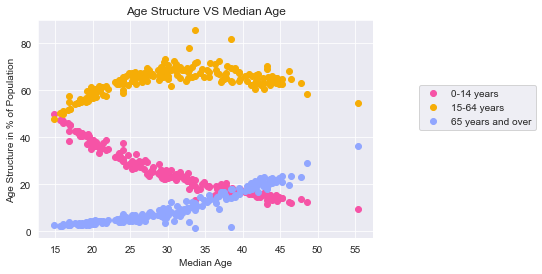

In [10]:
melted_age_structure = pd.melt(age_structure, value_vars=['0-14 years', '15-64 years', '65 years and over'])

def plot_age_pyramid_versus_metric(age_structure_df, metric_series, metric_name):
    plt.scatter(y=age_structure_df['0-14 years'], x=metric_series, label='0-14 years', color='#f653a6')
    plt.scatter(y=age_structure_df['15-64 years'], x=metric_series, label='15-64 years', color='#f6ad06')
    plt.scatter(y=age_structure_df['65 years and over'], x=metric_series, label='65 years and over', color='#91a6ff')
    plt.title(f"Age Structure VS {metric_name}")
    plt.ylabel('Age Structure in % of Population')
    plt.xlabel(metric_name)
    plt.legend(bbox_to_anchor=(1.5, 0.6), loc='center right')
    plt.show()

plot_age_pyramid_versus_metric(age_structure, median_age['total'], 'Median Age')

(array([20., 26., 29., 31., 23., 22., 22., 17.,  2.,  1.]),
 array([14.8 , 18.86, 22.92, 26.98, 31.04, 35.1 , 39.16, 43.22, 47.28,
        51.34, 55.4 ]),
 <BarContainer object of 10 artists>)

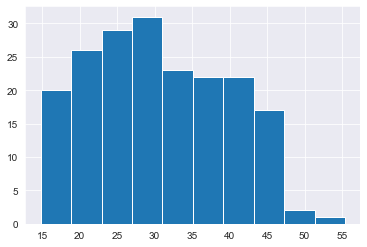

In [11]:
plt.hist(median_age['total'])

In [6]:
pd.melt(age_structure, value_vars=['0-14 years', '15-64 years', '65 years and over'])

,variable,value
0,0-14 years,39.80
1,0-14 years,17.90
2,0-14 years,28.78
3,0-14 years,12.31
4,0-14 years,47.18
...,...,...
580,65 years and over,8.90
581,65 years and over,7.87
582,65 years and over,3.34
583,65 years and over,2.74


### Countries by continents
https://www.cia.gov/the-world-factbook/field/geographic-overview from here download countries names & continents

In [5]:
continents = downloading.open_metric('countries')

In [6]:
continents.head()

,continent
country,
Algeria,Africa
Angola,Africa
Benin,Africa
Botswana,Africa
Burkina Faso,Africa


In [22]:
type(continents.loc['Poland', 'continent'])

str

(array([54.,  0., 49.,  0., 48.,  0., 23.,  0., 14., 12.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

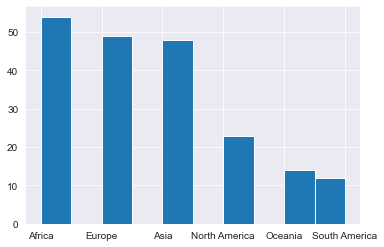

In [23]:
plt.hist(continents)

In [17]:
continents

,continent
country,
Algeria,Africa
Angola,Africa
Benin,Africa
Botswana,Africa
Burkina Faso,Africa
...,...
Paraguay,South America
Peru,South America
Suriname,South America


ValueError: cannot set using a list-like indexer with a different length than the value

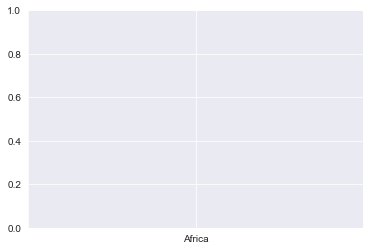

In [25]:
sns.histplot(continents, x='continent')

In [26]:
def country_names(df):
    values = df.index.values
    return [val[:20] for val in values]

### Countries age structure

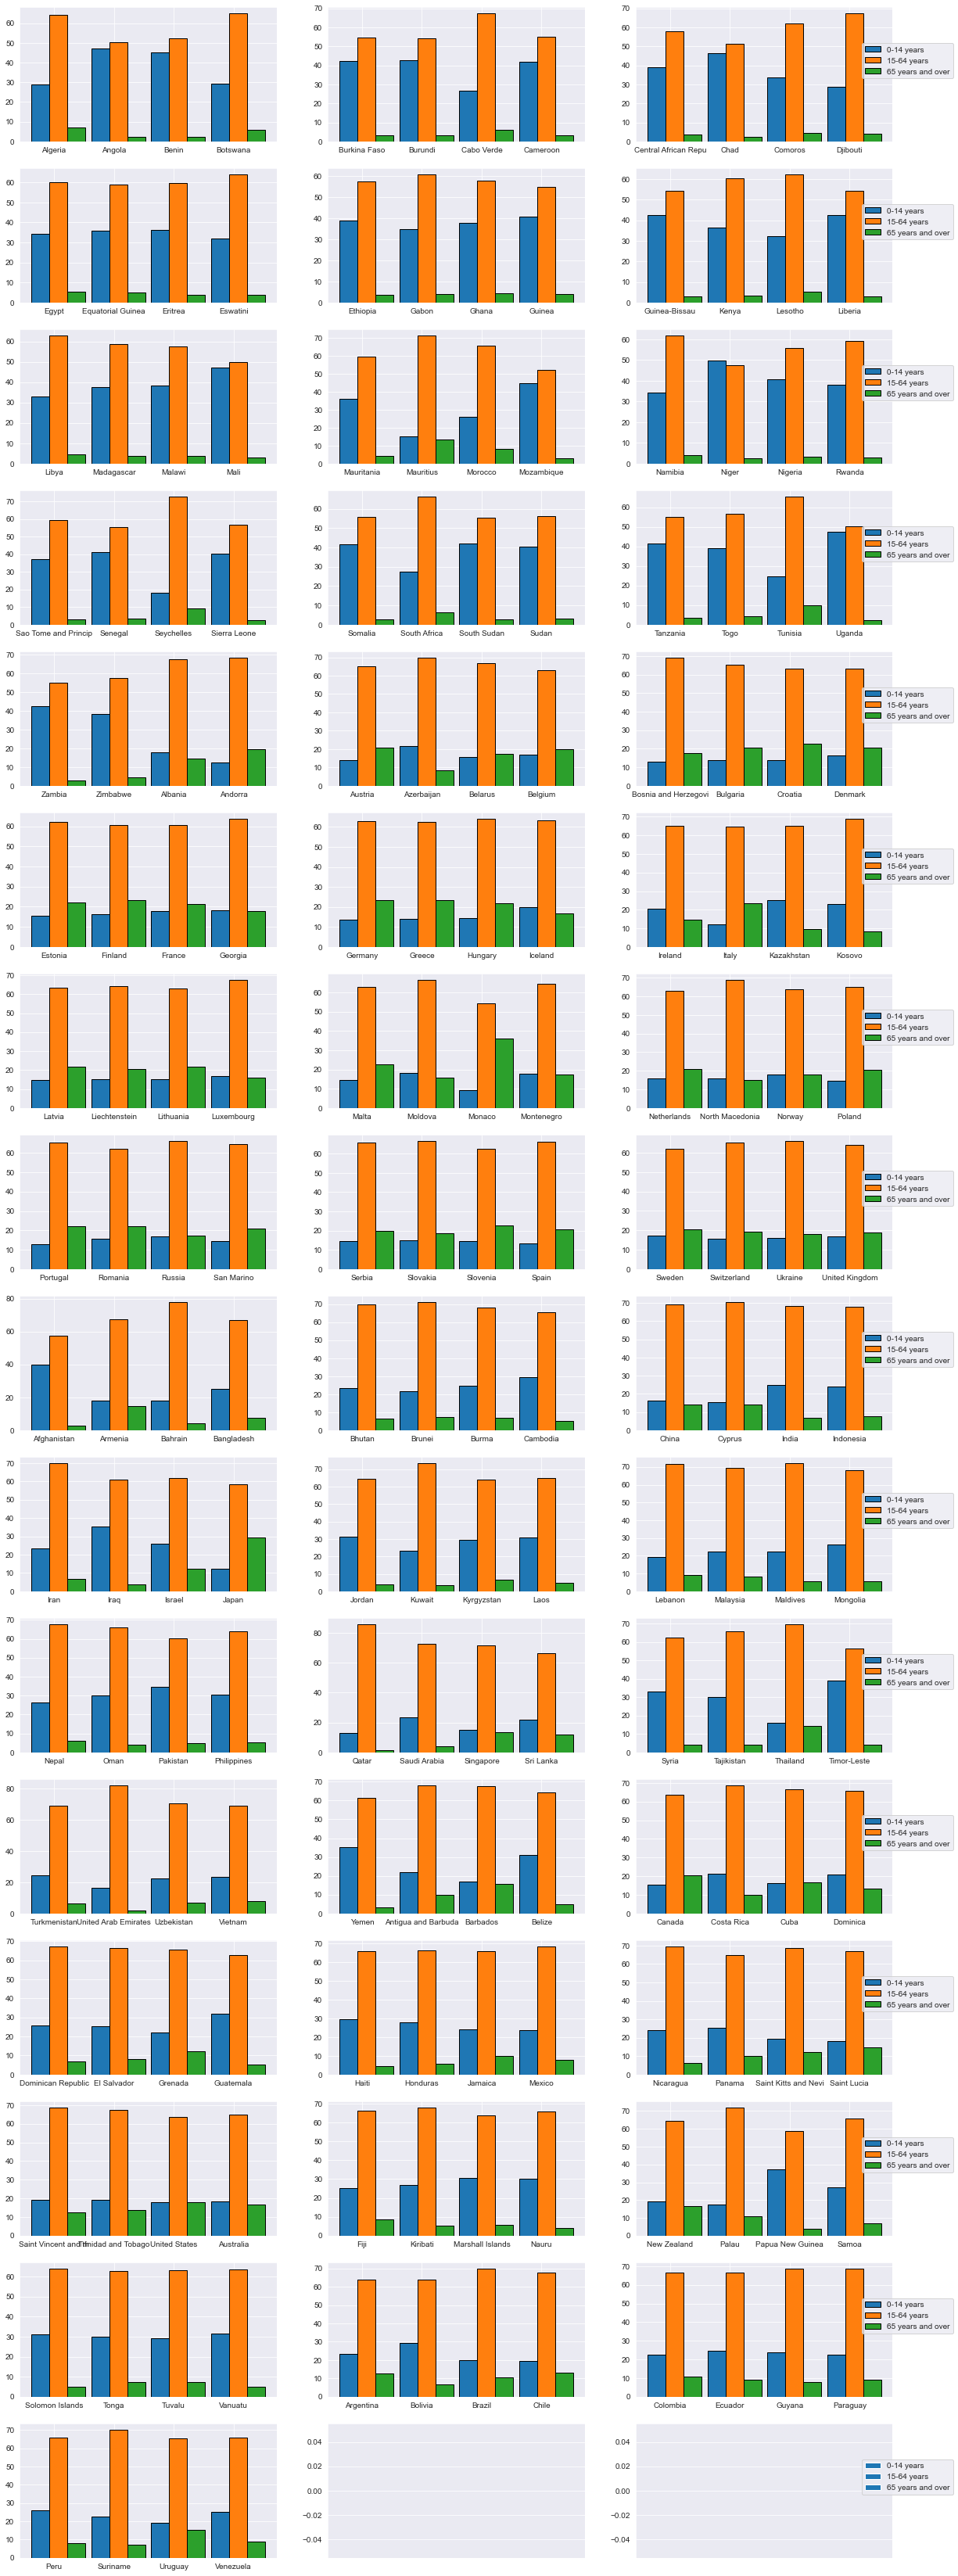

In [27]:
age_structure = age_structure.dropna()
n_c = 4
n_r = 12

n_rows = n_countries // n_r
n_cols = 3
i = 1
plt.figure(figsize=(20, 60))
for row in range(0, n_rows):
    for col in range(0, n_cols):
        plt.subplot(n_rows, n_cols, i)
        i += 1
        curr_rows = age_structure.iloc[row * n_r + col * n_c: min(n_countries, row * n_r + (col + 1) * n_c)]
        spc = np.arange(len(curr_rows))
        plt.bar(spc, curr_rows['0-14 years'], width=0.3, label='0-14 years', edgecolor='k')
        plt.bar(spc + 0.3, curr_rows['15-64 years'], width=0.3, label='15-64 years', edgecolor='k')
        plt.bar(spc + 0.6, curr_rows['65 years and over'], width=0.3, label='65 years and over', edgecolor='k')
        plt.xticks(spc + 0.45 / 2, country_names(curr_rows))
    plt.legend(bbox_to_anchor=(1.25, 0.6), loc='center right')

# Interesting pyramids:

What could be the definition for ageing population? It can either be the ratio of eldery / youth or the median age. Since in this analysis we don't use temporal data, we'll stick with the ratio. Or assume that the ratio and the median age must be above some threshold

<AxesSubplot:xlabel='ageing_rate'>

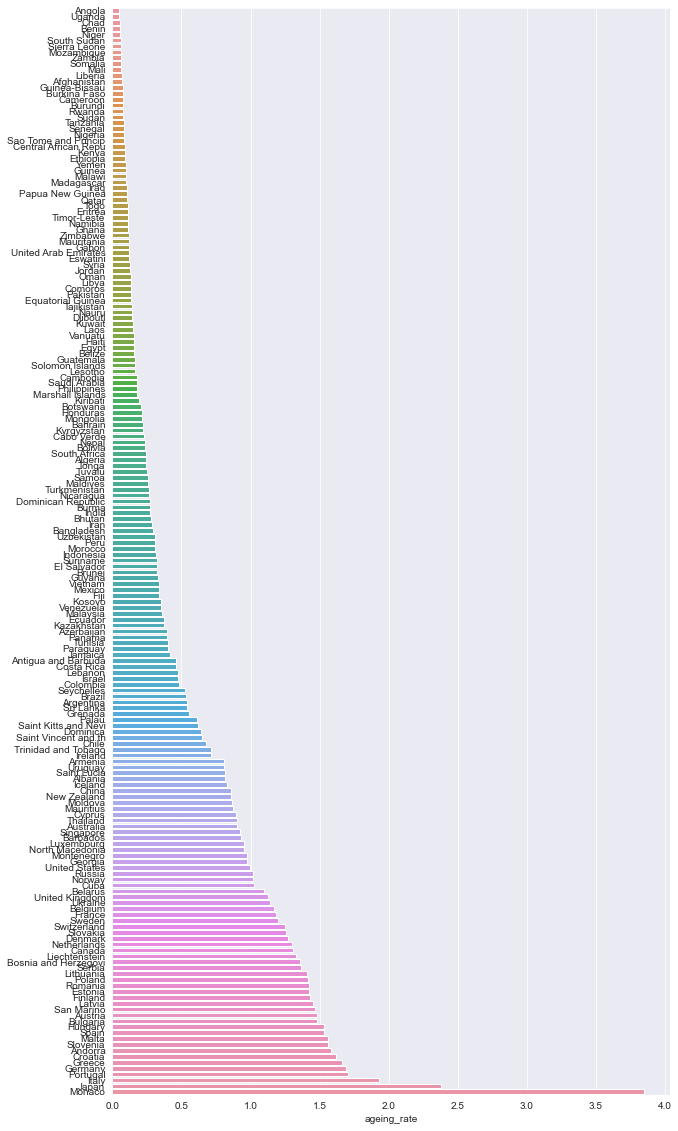

In [28]:
age_structure['ageing_rate'] = age_structure['65 years and over'] / age_structure['0-14 years']

fig, ax = plt.subplots(figsize=(10, 20))
sorted_by_ageing_rate = age_structure.sort_values(by='ageing_rate')
sns.barplot(data=sorted_by_ageing_rate, x='ageing_rate', y=country_names(sorted_by_ageing_rate))

<AxesSubplot:xlabel='median age'>

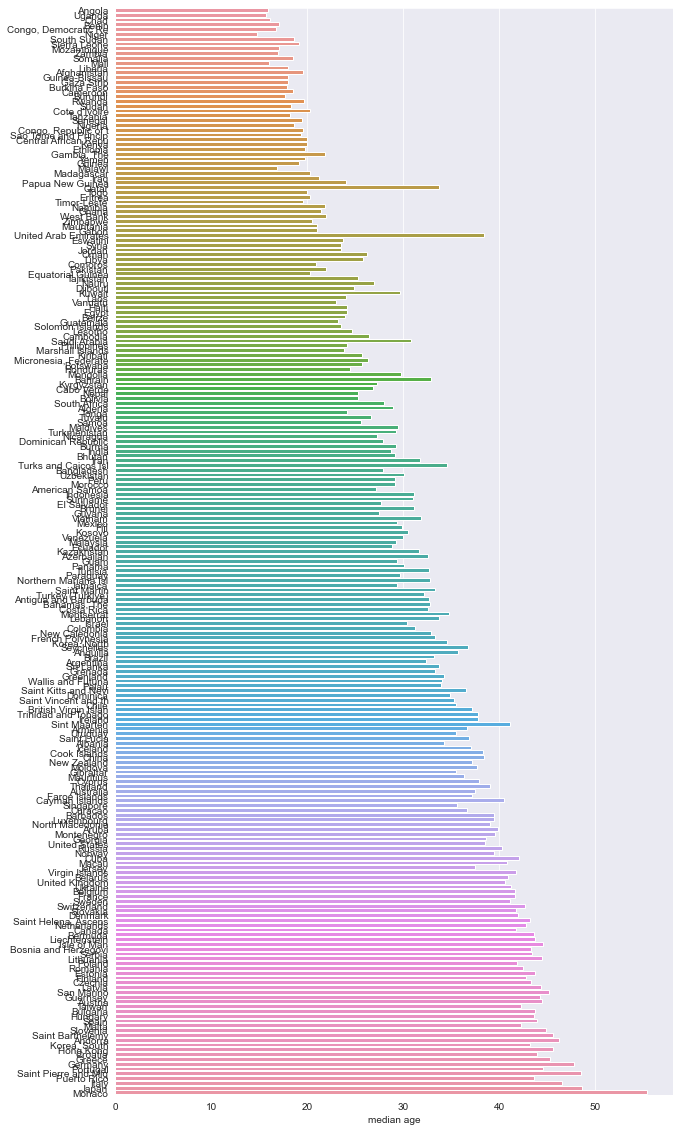

In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.barplot(data=sorted_by_ageing_rate, x='median age', y=country_names(sorted_by_ageing_rate))

In [ ]:
thresholds = [0.8, 0.9, 1]
ageing_cat = pd.DataFrame(index=['mean', 'n_countries'])
for t in thresholds:
    ageing_cat.at['mean', f't = {t}'] = np.mean(age_structure['ageing_rate'] >= t)
    ageing_cat.at['n_countries', f't = {t}'] = np.sum(age_structure['ageing_rate'] >= t)

ageing_cat.at['mean', 'median'] = np.mean(age_structure['median age'] >= 30)
ageing_cat.at['n_countries', 'median'] = np.sum(age_structure['median age'] >= 30)

ageing_cat.at['mean', 'both'] = np.mean((age_structure['median age'] >= 30) & (age_structure['ageing_rate'] >= 1))
ageing_cat.at['n_countries', 'both'] = np.sum((age_structure['median age'] >= 30) & (age_structure['ageing_rate'] >= 1))
ageing_cat

,t = 0.8,t = 0.9,t = 1,median,both
mean,0.339207,0.286344,0.229075,0.546256,0.229075
n_countries,77.000000,65.000000,52.000000,124.000000,52.000000


In [ ]:
ageing_countries = age_structure[age_structure['ageing_rate'] >= 1]
ageing_countries

,0-14 years,15-64 years,65 years and over,median age,ageing_rate
country,,,,,
Russia,16.86,65.99,17.15,40.3,1.017200
Japan,12.29,58.49,29.22,48.6,2.377543
Germany,13.75,62.97,23.28,47.8,1.693091
France,18.04,60.53,21.42,41.7,1.187361
United Kingdom,16.91,64.03,19.06,40.6,1.127144
Italy,12.08,64.61,23.31,46.5,1.929636
"Korea, South",11.53,70.10,18.38,43.2,1.594102
Spain,13.37,66.13,20.50,43.9,1.533283
Ukraine,15.90,65.95,18.15,41.2,1.141509


In [17]:
columns_corr = countries_data.corr()

<AxesSubplot:>

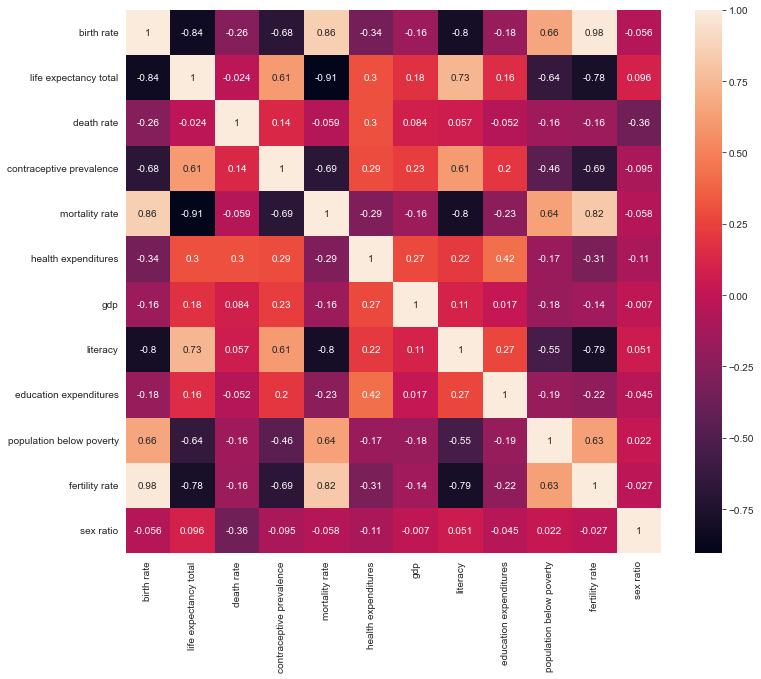

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(data=columns_corr, annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

y = countries_data['ageing_rate']
X = countries_data.drop(['ageing_rate'], axis=1)

tranformed_countries_data = countries_data.dropna(thresh=countries_data.shape[1] // 2)
tranformed_countries_data = tranformed_countries_data.dropna(subset=['ageing_rate'])
valid_rows = np.isin(X.index.values, tranformed_countries_data.index.values)
X_prep = X.loc[valid_rows]
y_prep = y.loc[valid_rows]

X_train, X_test, y_train, y_test = train_test_split(X_prep, y_prep, test_size=0.3,
                                                    random_state=42)
X_train.head()

,birth rate,life expectancy total,death rate,contraceptive prevalence,mortality rate,health expenditures,gdp,literacy,education expenditures,population below poverty,fertility rate,sex ratio
country,,,,,,,,,,,,
Taiwan,7.33,81.38,7.98,75.2,3.90,NaN,6.113910e+11,98.5,NaN,1.5,1.09,0.97
Denmark,11.25,81.87,9.55,NaN,3.00,10.5,3.500370e+11,NaN,6.4,12.5,1.77,0.99
Armenia,10.80,76.40,9.54,57.1,11.89,12.2,1.369400e+10,99.8,2.8,26.4,1.65,0.96
Cook Islands,12.34,77.39,9.20,NaN,15.53,3.2,2.999000e+08,NaN,4.6,NaN,2.04,1.05
Chad,39.85,59.57,9.21,8.1,63.99,5.4,1.091200e+10,26.8,2.9,42.3,5.35,0.98


Our data contains missing values. We'll fill in the missing values with the average and drop samples where more than 50% is missing

In [ ]:
print(X_train.describe())
print(y_train.describe())

       birth rate  life expectancy total  death rate  \
count  158.000000             158.000000  158.000000   
mean    17.458291              74.913861    7.271013   
std      8.288075               6.366570    2.548064   
min      6.540000              54.050000    1.620000   
25%     11.275000              71.665000    5.590000   
50%     15.030000              76.090000    6.835000   
75%     21.950000              79.687500    8.987500   
max     41.420000              85.160000   15.120000   

       contraceptive prevalence  mortality rate  health expenditures  \
count                106.000000      158.000000           129.000000   
mean                  50.084906       18.987342             7.264341   
std                   20.396180       17.503811             3.415676   
min                    6.900000        1.510000             2.400000   
25%                   30.200000        6.655000             4.600000   
50%                   53.850000       12.135000             6.7

### Linear Regression

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

model = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    StandardScaler(), LinearRegression()
)

model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9361022041306085

Now we don't have any missing values - otherwise, some sklearn algorithms may not run

In [ ]:
model.score(X_test, y_test)

0.8324570156086156

Let's try to make a prediction for the rows with test set

count    227.000000
mean       0.603324
std        0.567318
min        0.049385
25%        0.139743
50%        0.373713
75%        0.949379
max        3.848936
Name: ageing_rate, dtype: float64


(array([69., 28., 26., 16.,  7.,  5., 18., 11.,  6.,  7., 11., 11.,  6.,
         1.,  3.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([0.04938533, 0.17603703, 0.30268872, 0.42934042, 0.55599211,
        0.68264381, 0.8092955 , 0.93594719, 1.06259889, 1.18925058,
        1.31590228, 1.44255397, 1.56920567, 1.69585736, 1.82250906,
        1.94916075, 2.07581245, 2.20246414, 2.32911584, 2.45576753,
        2.58241922, 2.70907092, 2.83572261, 2.96237431, 3.089026  ,
        3.2156777 , 3.34232939, 3.46898109, 3.59563278, 3.72228448,
        3.84893617]),
 <BarContainer object of 30 artists>)

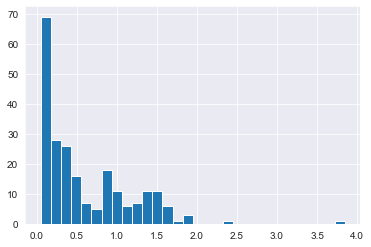

In [ ]:
print(countries_data['ageing_rate'].describe())
plt.hist(countries_data['ageing_rate'], bins=30)

### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(), LinearRegression()
)

model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, model.predict(X_train))

4.31010273182198e-14

In [ ]:
mean_absolute_error(y_test, model.predict(X_test))

0.652069691654977

### SVM Regressor

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearSVR does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print(mean_absolute_error(y_train, svm_reg.predict(X_train)))
print(mean_absolute_error(y_test, svm_reg.predict(X_test)))

In [ ]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X_train, y_train)

In [ ]:
print(mean_absolute_error(y_train, svm_poly_reg.predict(X_train)))
print(mean_absolute_error(y_test, svm_poly_reg.predict(X_test)))

In [ ]:
svm_rbf_reg = SVR(kernel='rbf', C=100, epsilon=0.1)
svm_rbf_reg.fit(X_train, y_train)

In [ ]:
print(mean_absolute_error(y_train, svm_rbf_reg.predict(X_train)))
print(mean_absolute_error(y_test, svm_rbf_reg.predict(X_test)))